<a href="https://colab.research.google.com/github/mugambiian/MoringaCoreIndependentProjectWeek2/blob/master/Week_2_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



We will attempt tp precict whether an individual has a bank acount or not as an indicator of likley economic growth

In [138]:
#we import the libraries we will need to work on our solution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data loading**

---

In [139]:
# we import our variable definitions and confirm that is has loaded succesfully
Variable_Definitions = pd.read_csv('/content/VariableDefinitions.csv')
Variable_Definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [140]:
#we then load the financial dataset and confirm that it has loaded
Financial_Dataset = pd.read_csv('/content/Financial Dataset - 1.csv')
Financial_Dataset
Financial_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


**Data Cleaning**

In [141]:
#we take  a closer look at the dataset
Financial_Dataset. describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_193,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [142]:
#we check the nu,ber of values in each column 
Financial_Dataset.count()


country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

In [143]:
 #We do some data cleaning 
Financial_Dataset.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [183]:
#renaming the columns
Financial_Dataset = Financial_Dataset.rename(columns = {
    'country' : 'Country',
    'year' : 'Year',
    'uniqueid' : 'Uniqueid',
    'household_size' : 'Household_Size',
    'gender_of_respondent' : 'Gender_Of_Respondent',
    'The relathip with head' : 'Relationship_With_Head',
    'marital_status' : 'Marital_Status',
    'Level_of_Educuation' : 'Level_of_Education',
    'Respondent Age' : 'Respondent_Age'

})

In [182]:
#we confirm our changes
Financial_Dataset.columns

Index(['Country', 'Year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household_Size', 'Respondent_Age',
       'Gender_Of_Respondent', 'Relationship_With_Head', 'Marital_Status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [146]:
#we check the column types
Financial_Dataset.dtypes

Country                    object
Year                        int64
Uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
Household_Size            float64
Respondent_Age            float64
Gender_Of_Respondent       object
Relationship_With_Head     object
Marital_Status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [147]:
#we check for missing data
Financial_Dataset.isnull().sum()

Country                   14
Year                       0
Uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
Household_Size            28
Respondent_Age            34
Gender_Of_Respondent      34
Relationship_With_Head     4
Marital_Status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [148]:
#We drop the missing values as they are too few to be statistcially significant
Financial_Dataset.dropna(inplace=True)

In [149]:
#we drop the Uniqueid column
Financial_Dataset.drop('Uniqueid',axis = 1, inplace = True)

In [150]:
#we confirm our changes
Financial_Dataset.columns

Index(['Country', 'Year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household_Size', 'Respondent_Age',
       'Gender_Of_Respondent', 'Relationship_With_Head', 'Marital_Status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [179]:
#we confirm that out data is now clean and the values have been dropped
Financial_Dataset.isnull().sum()

Country                   0
Year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
Household_Size            0
Respondent_Age            0
Gender_Of_Respondent      0
Relationship_With_Head    0
Marital_Status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [152]:
#we check the shape of our data
Financial_Dataset.shape


(23343, 12)

**Analysis**

*Mean*

In [153]:
Categorical_Columns=list(Financial_Dataset.columns)
Categorical_Columns.remove('Respondent_Age')
Categorical_Columns.remove('Household_Size')
Numerical_Columns= ['Respondent_Age','Household_Size']

In [155]:
Financial_Dataset[Numerical_Columns].mean()

Respondent_Age    38.805509
Household_Size     3.688643
dtype: float64

*Median*

In [154]:
Financial_Dataset[Numerical_Columns].median()

Respondent_Age    35.0
Household_Size     3.0
dtype: float64

*Mode*

In [156]:
Financial_Dataset[Numerical_Columns].mode()

,Respondent_Age,Household_Size
0,30.0,2.0


*Range*

In [157]:
Max = Financial_Dataset[Numerical_Columns].max()
Min = Financial_Dataset[Numerical_Columns].min()
Range = Max - Min
Range

Respondent_Age    84.0
Household_Size    21.0
dtype: float64

Interquartile Range


In [158]:
InterQuartile_Range = Financial_Dataset[Numerical_Columns].quantile([0.25,0.5,0.75])
InterQuartile_Range

,Respondent_Age,Household_Size
0.25,26.0,2.0
0.50,35.0,3.0
0.75,49.0,5.0


*Distribution*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b698172d0>,
      dtype=object)

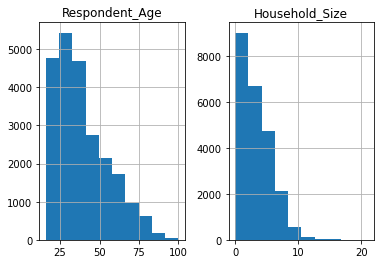

In [159]:
Financial_Dataset[Numerical_Columns].hist(bins=10)

*Standard Deviation*

In [160]:
Financial_Dataset[Numerical_Columns].std()

Respondent_Age    16.519803
Household_Size     2.281184
dtype: float64

*Kurtosis*

In [161]:
Financial_Dataset[Numerical_Columns].kurt()

Respondent_Age    0.098447
Household_Size    1.153869
dtype: float64

*Variance*

In [162]:
Financial_Dataset[Numerical_Columns].var()

Respondent_Age    272.903908
Household_Size      5.203798
dtype: float64

Distribution of numerical *features*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


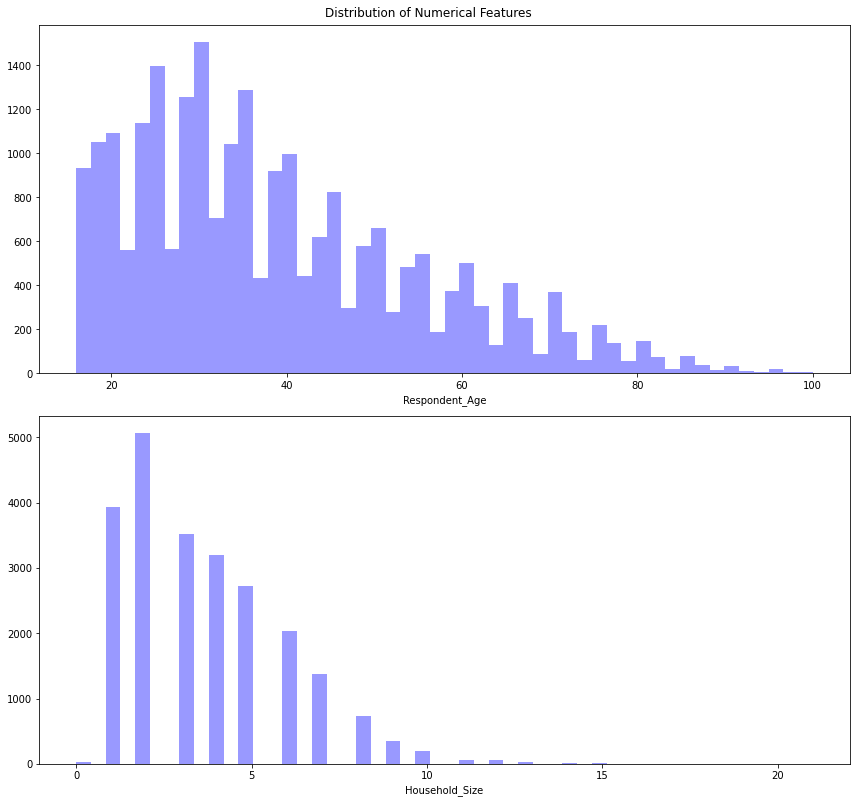

In [163]:
sns.set_style
fig, axes = plt.subplots(nrows=2, ncols = 1, figsize = (12, 11))
fig.suptitle('Distribution of Numerical Features', y= 1.01)

for ax, data, name in zip(axes.flatten(), Financial_Dataset, Numerical_Columns):
  sns.distplot(Financial_Dataset[name], ax = ax, kde = False, color = 'blue')
plt.tight_layout()

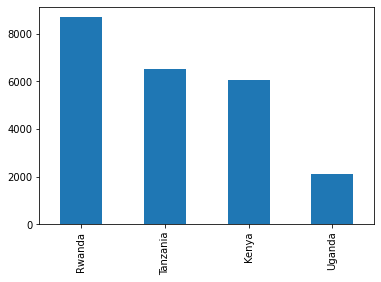

In [164]:
Financial_Dataset.Country.value_counts().plot.bar()

Rwanda has the highest number of interviewees while Uganda has the least number.


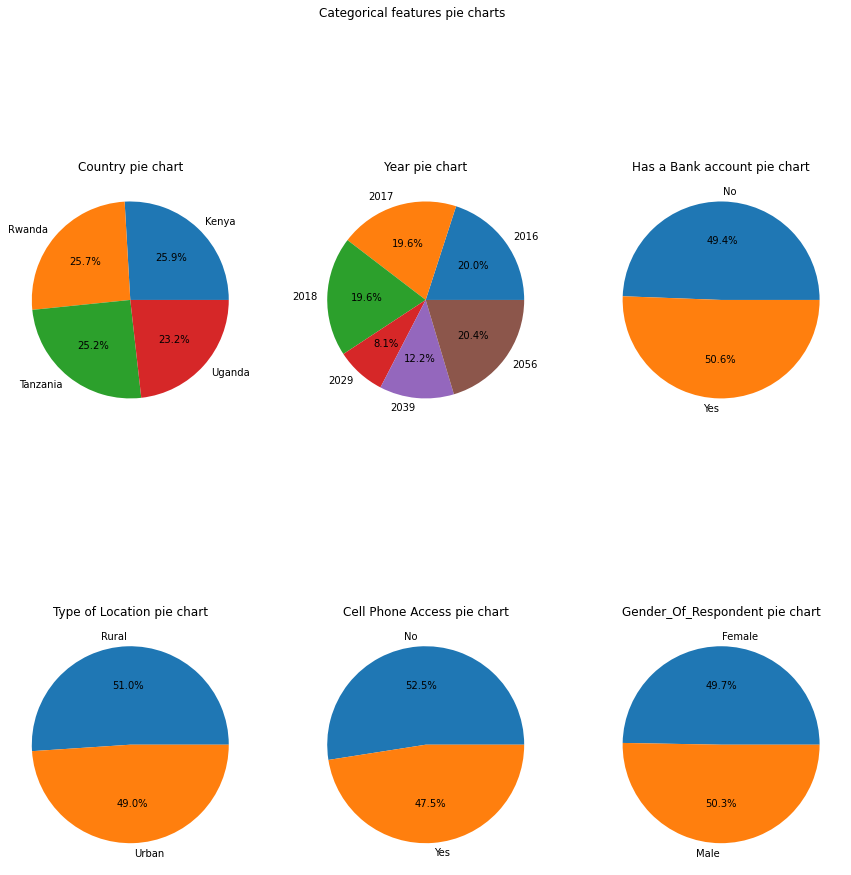

In [168]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
fig.suptitle('Categorical features pie charts')

for ax, data, name in zip(axes.flatten(), Financial_Dataset, Categorical_Columns):
  labels = Financial_Dataset.groupby(name).Respondent_Age.mean().index
  data = Financial_Dataset.groupby(name).Respondent_Age.mean().values
  ax.pie(data,
         labels = labels,
         autopct='%0.1f%%')
  ax.set_title(name+ ' pie chart')



Text(0.5, 1.0, 'Respondent Gender')

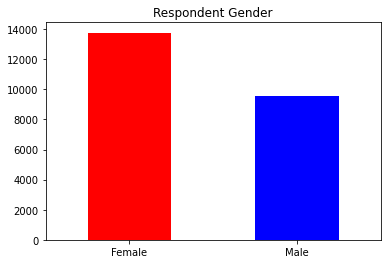

In [ ]:
# We check if the gender of the respondents could be a factor
Financial_Dataset.Gender_Of_Respondent.value_counts().plot(kind='bar', rot=0, color=('red','blue'))
plt.title("Respondent Gender")

We had more female respondents than male 

,Year,Household_Size,Respondent Age
Year,1.000000,-0.048902,-0.019062
Household_Size,-0.048902,1.000000,-0.119709
Respondent Age,-0.019062,-0.119709,1.000000


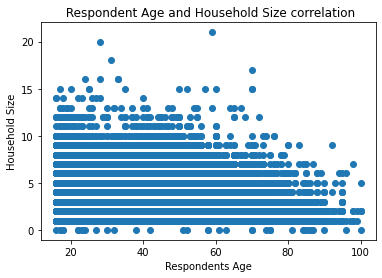

In [ ]:
#we check the correlation betwenn variables
plt.scatter(Financial_Dataset['Respondent Age'], Financial_Dataset['Household_Size'])
plt.xlabel("Respondents Age")
plt.ylabel("Household Size")
plt.title(" Respondent Age and Household Size correlation")

Financial_Dataset.corr()

There is a weak negative correlation between the Household size and year (-0.048902) and a weak negative corelation between the respondents age and Household size(-0.119709)

We investigate possible factors that may affect posession of a bank account

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Number of Respondents'),
 Text(0.5, 1.0, 'Bank Account by Gender')]

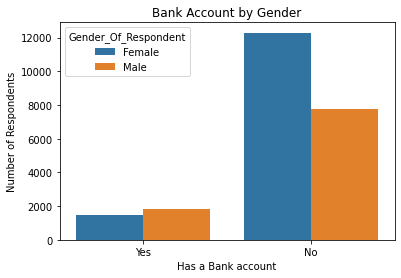

In [173]:
MaleOrFemale = sns.countplot('Has a Bank account', hue='Gender_Of_Respondent', data=Financial_Dataset)
MaleOrFemale.set(ylabel = 'Number of Respondents',
       title = 'Bank Account by Gender')

We see that there are more men that women with bank accounts thus gender i.e. being make may indicate a higher likleyhood of having a bank account


Text(0.5, 1.0, 'LEVEL OF EDUCATION VS HAS A BANK ACCOUNT')

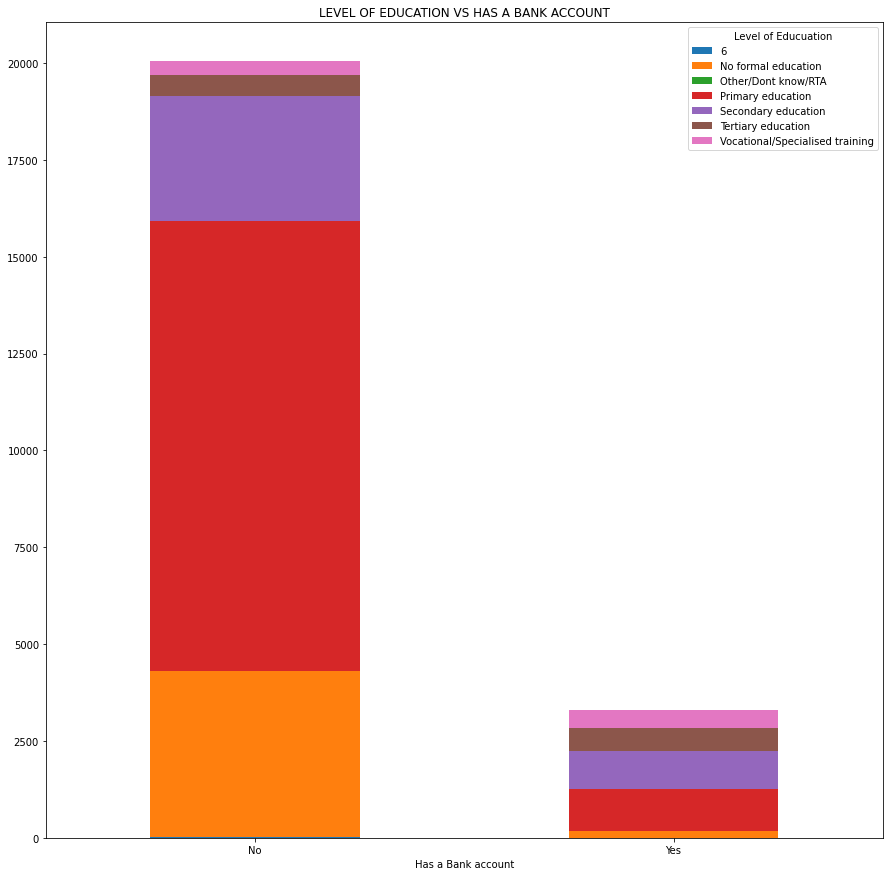

In [186]:
# we check if education level influences the possesion if a bank account 

Education_Level = Financial_Dataset.groupby(['Has a Bank account', 'Level of Educuation']).size().unstack().plot(kind='bar',
                                                                                        stacked=True,
                                                                                       rot=0,
                                                                                       figsize=([15,15]))
plt.title('LEVEL OF EDUCATION VS HAS A BANK ACCOUNT')


The level of education does not seem to be signifcant in determing if one posseses a bank account beyond primary education

